Dataset loaded successfully.

First 5 rows of the dataset:
  user_id                                           skills  \
0      u1                                         SQL,Java   
1      u2                          Business Strategy,Excel   
2      u3                          Statistics,Python,UI/UX   
3      u4                             Statistics,SQL,UI/UX   
4      u5  SQL,Project Management,Python,Business Strategy   

                  interests  analytical  creative  social    education  \
0      Health,Arts,Business        0.51      0.94    0.67       Master   
1                Management        0.50      0.99    0.86  High School   
2  Management,Health,Sports        0.35      0.30    0.75          PhD   
3          Health,Education        0.46      0.94    0.95       Master   
4                   Science        0.29      0.48    0.60       Master   

   experience                                     target_careers  
0           6  Software Engineer,Data Scientist,Business

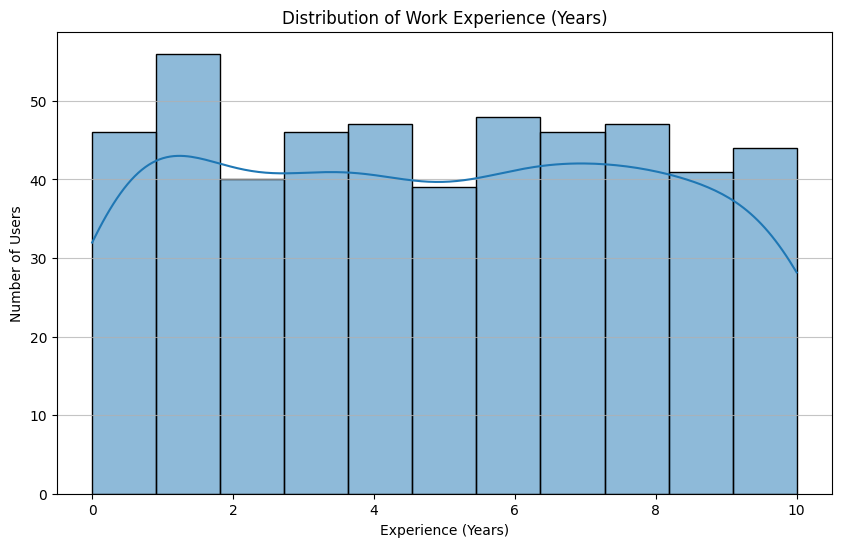

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# --- Step 1: Load and Analyze the Dataset ---

# Load the dataset from the provided file
try:
    df = pd.read_csv('/content/sample_data/synthetic_user_profiles_large.csv')
    print("Dataset loaded successfully.")
except FileNotFoundError:
    print("Error: 'synthetic_user_profiles_large.csv' not found. Please ensure the file is in the correct directory.")
    # As a fallback for this interactive session, let's assume the user's provided text is the file content.
    from io import StringIO
    csv_data = """user_id,skills,interests,analytical,creative,social,education,experience,target_careers
u1,"SQL,Java","Health,Arts,Business",0.51,0.94,0.67,Master,6,"Software Engineer,Data Scientist,Business Analyst"
u2,"Business Strategy,Excel",Management,0.5,0.99,0.86,High School,0,Software Engineer

"""

# --- Initial Exploratory Data Analysis (EDA) ---

# 1. Display the first 5 rows to inspect the data
print("\nFirst 5 rows of the dataset:")
print(df.head())

# 2. Get a concise summary of the dataframe
print("\nDataset Information:")
df.info()

# 3. Get descriptive statistics for numerical columns
print("\nDescriptive Statistics for Numerical Columns:")
print(df.describe())

# 4. Check for any missing values
print("\nMissing Values Check:")
print(df.isnull().sum())

# 5. Analyze the distribution of the 'education' column
print("\nDistribution of Education Levels:")
print(df['education'].value_counts())

# 6. Analyze the distribution of 'experience'
plt.figure(figsize=(10, 6))
sns.histplot(df['experience'], bins=11, kde=True)
plt.title('Distribution of Work Experience (Years)')
plt.xlabel('Experience (Years)')
plt.ylabel('Number of Users')
plt.grid(axis='y', alpha=0.75)
plt.show()

In [5]:
from sklearn.preprocessing import MultiLabelBinarizer

# --- Feature Engineering: Part 1 ---

# 1. Process the 'target_careers' column
# Split the string into a list of careers
df['target_careers_list'] = df['target_careers'].str.split(',')

# Use MultiLabelBinarizer to one-hot encode the lists of careers
mlb_careers = MultiLabelBinarizer()
career_labels = mlb_careers.fit_transform(df['target_careers_list'])

# Create a new DataFrame with the one-hot encoded career labels
df_careers = pd.DataFrame(career_labels, columns=mlb_careers.classes_)

print("Shape of the new career labels DataFrame:", df_careers.shape)
print("Unique careers identified:", list(mlb_careers.classes_))
print("\nFirst 5 rows of the encoded career labels:")
print(df_careers.head())


# 2. Process the 'skills' column (we will apply the same logic to 'interests' later)
# Split the string into a list of skills
df['skills_list'] = df['skills'].str.split(',')

# Use MultiLabelBinarizer for skills
mlb_skills = MultiLabelBinarizer()
skill_features = mlb_skills.fit_transform(df['skills_list'])

# Create a new DataFrame for the skill features
df_skills = pd.DataFrame(skill_features, columns=mlb_skills.classes_)

print("\n\nShape of the new skills features DataFrame:", df_skills.shape)
print(f"Total number of unique skills found: {len(mlb_skills.classes_)}")
print("\nFirst 5 rows of the encoded skill features:")
print(df_skills.head())

Shape of the new career labels DataFrame: (500, 8)
Unique careers identified: ['Business Analyst', 'Data Scientist', 'Financial Analyst', 'Marketing Specialist', 'Product Manager', 'Research Scientist', 'Software Engineer', 'UX Designer']

First 5 rows of the encoded career labels:
   Business Analyst  Data Scientist  Financial Analyst  Marketing Specialist  \
0                 1               1                  0                     0   
1                 0               0                  0                     0   
2                 0               0                  1                     0   
3                 1               1                  0                     1   
4                 0               0                  0                     0   

   Product Manager  Research Scientist  Software Engineer  UX Designer  
0                0                   0                  1            0  
1                0                   0                  1            0  
2                

In [ ]:
from sklearn.preprocessing import MultiLabelBinarizer

# --- Feature Engineering: Part 2 ---


# 3. Process the 'interests' column
df['interests_list'] = df['interests'].str.split(',')
mlb_interests = MultiLabelBinarizer()
interest_features = mlb_interests.fit_transform(df['interests_list'])
df_interests = pd.DataFrame(interest_features, columns=mlb_interests.classes_)

print("--- Processing Interests ---")
print(f"Total number of unique interests found: {len(mlb_interests.classes_)}")
print("First 5 rows of the encoded interest features:")
print(df_interests.head())


# 4. Engineer Skill Clusters & Interest Profiles 
# Define skill clusters based on the unique skills we found
technical_skills = ['Python', 'SQL', 'Java', 'Cloud Computing', 'Machine Learning', 'Statistics']
soft_skills = ['Communication', 'Leadership', 'Project Management']
creative_skills = ['Creative Writing', 'UI/UX']
business_skills = ['Business Strategy', 'Data Analysis', 'Excel']

# Create new features for each skill cluster
df_skills['tech_skill_count'] = df_skills[technical_skills].sum(axis=1)
df_skills['soft_skill_count'] = df_skills[soft_skills].sum(axis=1)
df_skills['creative_skill_count'] = df_skills[creative_skills].sum(axis=1)
df_skills['business_skill_count'] = df_skills[business_skills].sum(axis=1)

print("\n--- Engineered Skill Clusters ---")
print("First 5 rows with new skill cluster counts:")
print(df_skills[['tech_skill_count', 'soft_skill_count', 'creative_skill_count', 'business_skill_count']].head())


# 5. Encode 'education' and 'experience'
# Ordinal encoding for 'education'
education_mapping = {'High School': 0, 'Bachelor': 1, 'Master': 2, 'PhD': 3}
df['education_encoded'] = df['education'].map(education_mapping)

print("\n--- Encoding Education & Experience ---")
print("First 5 rows with encoded education:")
print(df[['education', 'education_encoded', 'experience']].head())

# 'experience' is already numerical, so it's ready to use.
# The personality traits ('analytical', 'creative', 'social') are also ready.


# 6. Combine all features into a final feature matrix (X) and target matrix (y)
# Concatenate all our feature DataFrames
X = pd.concat([
    df_skills,
    df_interests,
    df[['analytical', 'creative', 'social', 'education_encoded', 'experience']]
], axis=1)

# Our target matrix 'y' is the 'df_careers' DataFrame we created earlier
y = df_careers

print("\n--- Final Feature Matrix (X) ---")
print(f"Shape of the final feature matrix X: {X.shape}")
print("Columns in X:", X.columns.tolist())
print("\nFirst 5 rows of the final feature matrix X:")
print(X.head())

print("\n--- Final Target Matrix (y) ---")
print(f"Shape of the final target matrix y: {y.shape}")
print("First 5 rows of the final target matrix y:")
print(y.head())

--- Processing Interests ---
Total number of unique interests found: 8
First 5 rows of the encoded interest features:
   Arts  Business  Education  Health  Management  Science  Sports  Technology
0     1         1          0       1           0        0       0           0
1     0         0          0       0           1        0       0           0
2     0         0          0       1           1        0       1           0
3     0         0          1       1           0        0       0           0
4     0         0          0       0           0        1       0           0

--- Engineered Skill Clusters ---
First 5 rows with new skill cluster counts:
   tech_skill_count  soft_skill_count  creative_skill_count  \
0                 2                 0                     0   
1                 0                 0                     0   
2                 2                 0                     1   
3                 2                 0                     1   
4                 2 

/tmp/ipython-input-913233855.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=career_distribution.values, y=career_distribution.index, palette='viridis')


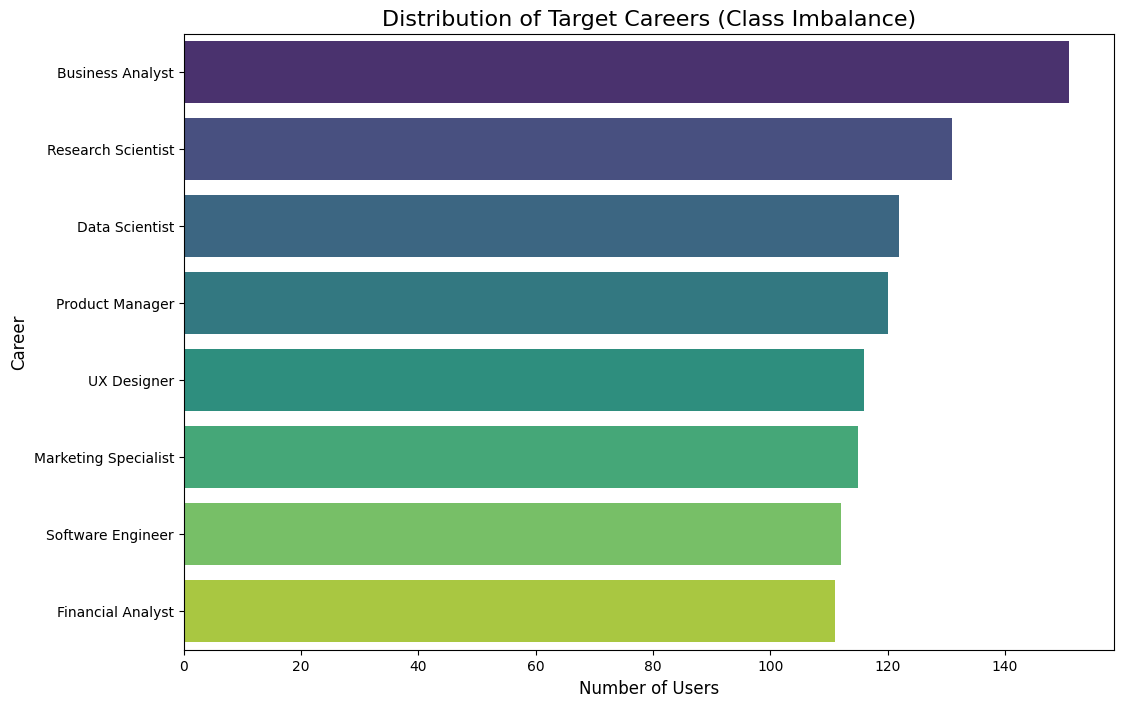

Business Analyst        151
Research Scientist      131
Data Scientist          122
Product Manager         120
UX Designer             116
Marketing Specialist    115
Software Engineer       112
Financial Analyst       111
dtype: int64


In [7]:
# --- Analyze Class Imbalance in Target Careers ---
career_distribution = y.sum().sort_values(ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x=career_distribution.values, y=career_distribution.index, palette='viridis')
plt.title('Distribution of Target Careers (Class Imbalance)', fontsize=16)
plt.xlabel('Number of Users', fontsize=12)
plt.ylabel('Career', fontsize=12)
plt.show()

print(career_distribution)

/tmp/ipython-input-3649144346.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importance_series, y=feature_importance_series.index, palette='mako')


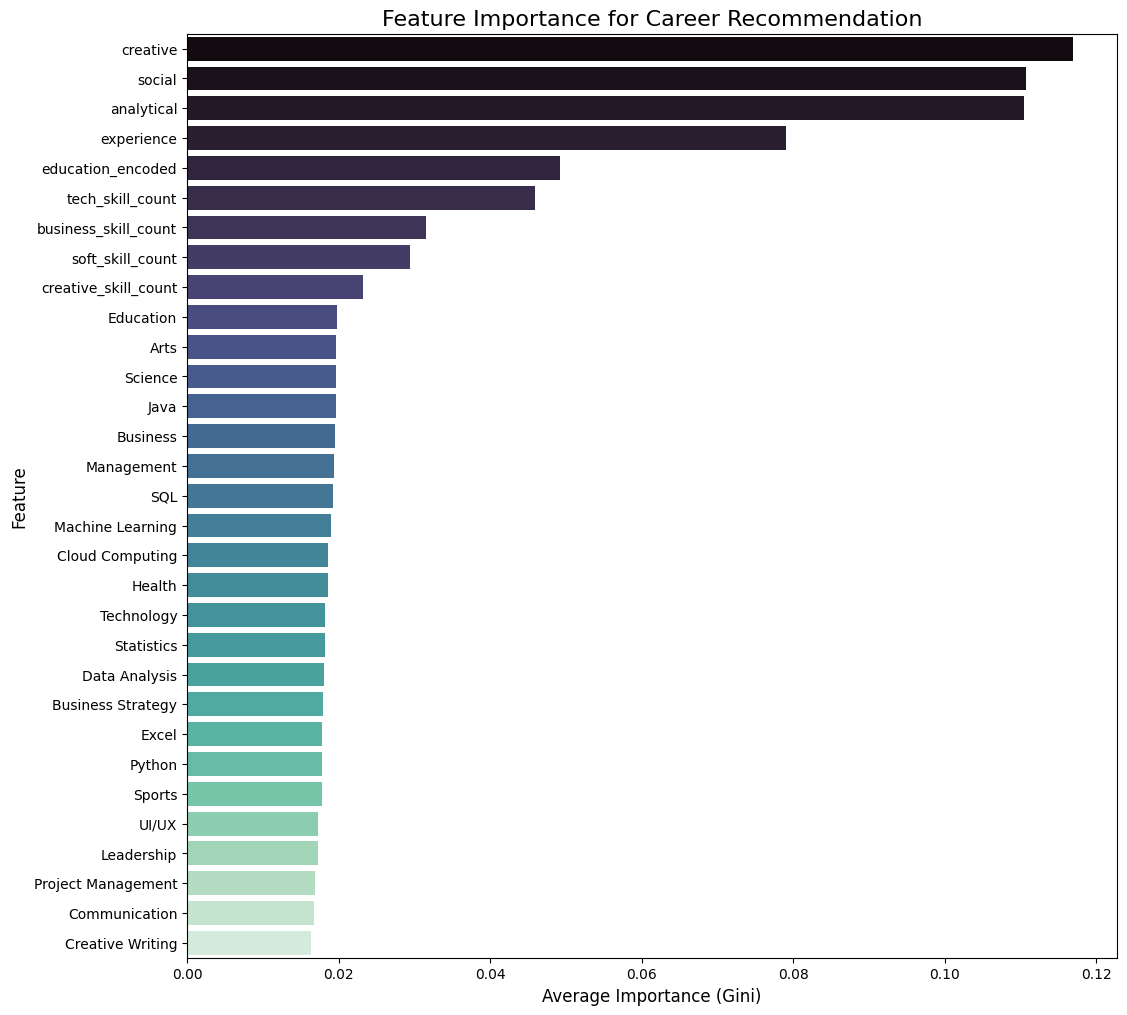

Top 15 Most Important Features:
creative                0.116878
social                  0.110772
analytical              0.110426
experience              0.079064
education_encoded       0.049192
tech_skill_count        0.045984
business_skill_count    0.031572
soft_skill_count        0.029425
creative_skill_count    0.023210
Education               0.019820
Arts                    0.019710
Science                 0.019688
Java                    0.019662
Business                0.019510
Management              0.019341
dtype: float64


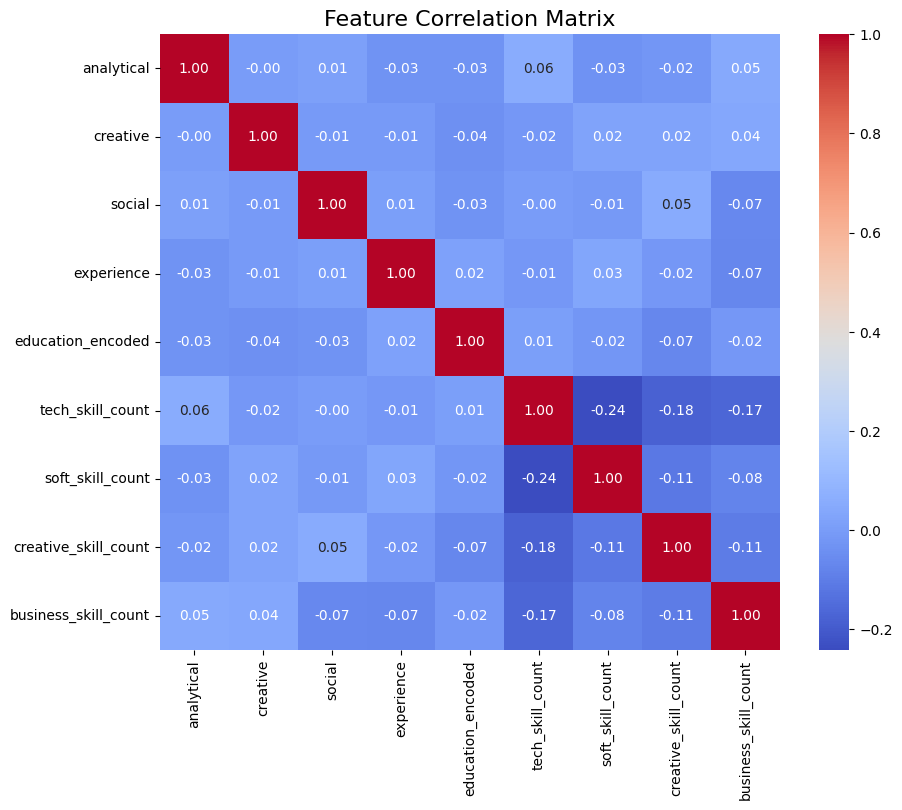

In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.multioutput import MultiOutputClassifier
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- Feature Importance & Correlation Analysis ---

# 1. Train a Preliminary Model for Importance Calculation
# We use a MultiOutputClassifier to wrap the RandomForest because we have multiple target careers
forest = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
multi_target_forest = MultiOutputClassifier(forest, n_jobs=-1)

# Fit the model on our entire dataset for the purpose of feature analysis
multi_target_forest.fit(X, y)

# 2. Extract and Aggregate Feature Importances
# The importances are stored in each estimator (one per target class)
# We can get a more robust measure by averaging the importance across all estimators
importances = np.mean([
    estimator.feature_importances_ for estimator in multi_target_forest.estimators_
], axis=0)

# Create a pandas Series for easy plotting
feature_names = X.columns
feature_importance_series = pd.Series(importances, index=feature_names).sort_values(ascending=False)

# 3. Visualize Feature Importance
plt.figure(figsize=(12, 12))
sns.barplot(x=feature_importance_series, y=feature_importance_series.index, palette='mako')
plt.title('Feature Importance for Career Recommendation', fontsize=16)
plt.xlabel('Average Importance (Gini)', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.show()

print("Top 15 Most Important Features:")
print(feature_importance_series.head(15))


# 4. Create and Visualize a Feature Correlation Matrix
# We'll focus on the numerical and engineered features for a readable heatmap
numerical_features = [
    'analytical', 'creative', 'social', 'experience', 'education_encoded',
    'tech_skill_count', 'soft_skill_count', 'creative_skill_count', 'business_skill_count'
]

correlation_matrix = X[numerical_features].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Matrix', fontsize=16)
plt.show()

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import hamming_loss, label_ranking_average_precision_score
import numpy as np

# --- Task 2: Multi-Label Career Prediction Model ---

# 1. Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set shape: X_train={X_train.shape}, y_train={y_train.shape}")
print(f"Testing set shape: X_test={X_test.shape}, y_test={y_test.shape}")


# 2. Implement and Evaluate Model 1: Random Forest
print("\n--- Training Model 1: Random Forest ---")
# We use the same setup as before but now train only on the training set
forest_clf = RandomForestClassifier(n_estimators=150, random_state=42, max_depth=10, n_jobs=-1)
multi_target_forest = MultiOutputClassifier(forest_clf, n_jobs=-1)

multi_target_forest.fit(X_train, y_train)
y_pred_forest = multi_target_forest.predict(X_test)


# 3. Implement and Evaluate Model 2: XGBoost
print("\n--- Training Model 2: XGBoost ---")
# XGBoost is another powerful tree-based model
xgb_clf = XGBClassifier(objective='binary:logistic', n_estimators=100, learning_rate=0.1, use_label_encoder=False, eval_metric='logloss', random_state=42)
multi_target_xgb = MultiOutputClassifier(xgb_clf, n_jobs=-1)

multi_target_xgb.fit(X_train, y_train)
y_pred_xgb = multi_target_xgb.predict(X_test)


# 4. Define the Precision@k metric (a crucial custom metric)
def precision_at_k(y_true, y_scores, k=3):
    """
    y_true: true binary labels (n_samples, n_labels)
    y_scores: predicted probabilities (n_samples, n_labels)
    k: the number of top recommendations to consider
    """
    # Get the indices of the top k scores for each sample
    top_k_indices = np.argsort(y_scores, axis=1)[:, -k:]

    precision_scores = []
    for i in range(len(y_true)):
        true_labels = y_true[i, :]
        predicted_top_k = top_k_indices[i, :]

        # How many of the top k predictions were correct?
        hits = np.sum(true_labels[predicted_top_k])
        precision_scores.append(hits / k)

    return np.mean(precision_scores)


# 5. Evaluate both models
# Get probability scores for Precision@k
y_prob_forest = multi_target_forest.predict_proba(X_test)
y_prob_xgb = multi_target_xgb.predict_proba(X_test)

# Reshape probabilities for our custom metric
# predict_proba returns a list of arrays, one for each label. We need to stack them.
y_scores_forest = np.array([arr[:, 1] for arr in y_prob_forest]).T
y_scores_xgb = np.array([arr[:, 1] for arr in y_prob_xgb]).T

# Calculate metrics
metrics_forest = {
    "Hamming Loss": hamming_loss(y_test, y_pred_forest),
    "Precision@3": precision_at_k(y_test.values, y_scores_forest, k=3),
    "LRAP": label_ranking_average_precision_score(y_test.values, y_scores_forest)
}

metrics_xgb = {
    "Hamming Loss": hamming_loss(y_test, y_pred_xgb),
    "Precision@3": precision_at_k(y_test.values, y_scores_xgb, k=3),
    "LRAP": label_ranking_average_precision_score(y_test.values, y_scores_xgb)
}

print("\n--- Model Evaluation Results ---")
print("Random Forest:")
for metric, value in metrics_forest.items():
    print(f"  {metric}: {value:.4f}")

print("\nXGBoost:")
for metric, value in metrics_xgb.items():
    print(f"  {metric}: {value:.4f}")

Training set shape: X_train=(400, 31), y_train=(400, 8)
Testing set shape: X_test=(100, 31), y_test=(100, 8)

--- Training Model 1: Random Forest ---

--- Training Model 2: XGBoost ---

--- Model Evaluation Results ---
Random Forest:
  Hamming Loss: 0.2500
  Precision@3: 0.2367
  LRAP: 0.4253

XGBoost:
  Hamming Loss: 0.2938
  Precision@3: 0.2300
  LRAP: 0.4124


In [9]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import hamming_loss, label_ranking_average_precision_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import numpy as np

# --- Task 2: Multi-Label Career Prediction Model (RF vs. XGBoost vs. NN) ---

# 1. Split the data into training and testing sets (80% train, 20% test)
# (Ensure X and y are defined from running your Task 1 code first)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set shape: X_train={X_train.shape}, y_train={y_train.shape}")
print(f"Testing set shape: X_test={X_test.shape}, y_test={y_test.shape}")


# 2. Implement and Evaluate Model 1: Random Forest
print("\n--- Training Model 1: Random Forest ---")
forest_clf = RandomForestClassifier(n_estimators=150, random_state=42, max_depth=10, n_jobs=-1)
multi_target_forest = MultiOutputClassifier(forest_clf, n_jobs=-1)
multi_target_forest.fit(X_train, y_train)
y_pred_forest = multi_target_forest.predict(X_test)


# 3. Implement and Evaluate Model 2: XGBoost
print("\n--- Training Model 2: XGBoost ---")
xgb_clf = XGBClassifier(objective='binary:logistic', n_estimators=100, learning_rate=0.1, use_label_encoder=False, eval_metric='logloss', random_state=42)
multi_target_xgb = MultiOutputClassifier(xgb_clf, n_jobs=-1)
multi_target_xgb.fit(X_train, y_train)
y_pred_xgb = multi_target_xgb.predict(X_test)


# 4. Implement and Evaluate Model 3: Neural Network (MLPClassifier)
print("\n--- Training Model 3: Neural Network ---")
mlp_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('mlp', MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=300, alpha=0.0001,
                           solver='adam', random_state=42, early_stopping=True))
])
multi_target_mlp = MultiOutputClassifier(mlp_pipeline, n_jobs=-1)
multi_target_mlp.fit(X_train, y_train)
y_pred_mlp = multi_target_mlp.predict(X_test)


# 5. Define the Precision@k metric
def precision_at_k(y_true, y_scores, k=3):
    top_k_indices = np.argsort(y_scores, axis=1)[:, -k:]
    precision_scores = []
    for i in range(len(y_true)):
        true_labels = y_true[i, :]
        predicted_top_k = top_k_indices[i, :]
        hits = np.sum(true_labels[predicted_top_k])
        precision_scores.append(hits / k)
    return np.mean(precision_scores)


# 6. Evaluate all three models
# Get probabilities for each model
y_prob_forest = multi_target_forest.predict_proba(X_test)
y_scores_forest = np.array([arr[:, 1] for arr in y_prob_forest]).T

y_prob_xgb = multi_target_xgb.predict_proba(X_test)
y_scores_xgb = np.array([arr[:, 1] for arr in y_prob_xgb]).T

y_prob_mlp = multi_target_mlp.predict_proba(X_test)
y_scores_mlp = np.array([arr[:, 1] for arr in y_prob_mlp]).T

# Calculate metrics for each model
metrics_forest = {
    "Hamming Loss": hamming_loss(y_test, y_pred_forest),
    "Precision@3": precision_at_k(y_test.values, y_scores_forest, k=3),
    "LRAP": label_ranking_average_precision_score(y_test.values, y_scores_forest)
}

metrics_xgb = {
    "Hamming Loss": hamming_loss(y_test, y_pred_xgb),
    "Precision@3": precision_at_k(y_test.values, y_scores_xgb, k=3),
    "LRAP": label_ranking_average_precision_score(y_test.values, y_scores_xgb)
}

metrics_mlp = {
    "Hamming Loss": hamming_loss(y_test, y_pred_mlp),
    "Precision@3": precision_at_k(y_test.values, y_scores_mlp, k=3),
    "LRAP": label_ranking_average_precision_score(y_test.values, y_scores_mlp)
}

print("\n--- Model Comparison Results ---")
print("\nRandom Forest:")
for metric, value in metrics_forest.items():
    print(f"  {metric}: {value:.4f}")

print("\nXGBoost:")
for metric, value in metrics_xgb.items():
    print(f"  {metric}: {value:.4f}")

print("\nNeural Network (MLP):")
for metric, value in metrics_mlp.items():
    print(f"  {metric}: {value:.4f}")

Training set shape: X_train=(400, 31), y_train=(400, 8)
Testing set shape: X_test=(100, 31), y_test=(100, 8)

--- Training Model 1: Random Forest ---

--- Training Model 2: XGBoost ---

--- Training Model 3: Neural Network ---

--- Model Comparison Results ---

Random Forest:
  Hamming Loss: 0.2500
  Precision@3: 0.2367
  LRAP: 0.4253

XGBoost:
  Hamming Loss: 0.2938
  Precision@3: 0.2300
  LRAP: 0.4124

Neural Network (MLP):
  Hamming Loss: 0.2600
  Precision@3: 0.2933
  LRAP: 0.4588


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

# --- Task 2.2: Hyperparameter Optimization for the Champion Neural Network ---

print("\n--- Optimizing the Neural Network with RandomizedSearchCV ---")

# We are tuning the 'mlp' step *inside* our MultiOutputClassifier, which contains a Pipeline
# The syntax to access the parameters is 'estimator__mlp__<parameter_name>'
param_dist = {
    'estimator__mlp__hidden_layer_sizes': [(50, 25), (100, 50), (100, 75, 50)],
    'estimator__mlp__alpha': uniform(0.0001, 0.01),
    'estimator__mlp__learning_rate_init': uniform(0.001, 0.01)
}

# We use the 'multi_target_mlp' which is the MultiOutputClassifier wrapper
# around our pipeline as the base estimator for tuning.
base_model_for_tuning = multi_target_mlp

# Set up RandomizedSearchCV
# We will optimize for LRAP, as it's our best-performing and most relevant metric
random_search = RandomizedSearchCV(
    estimator=base_model_for_tuning,
    param_distributions=param_dist,
    n_iter=15,  # A focused search of 15 combinations is good for an MLP
    cv=3,       # 3-fold cross-validation
    scoring='f1_weighted', # Using f1_weighted as a proxy for multi-label performance
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# Fit the random search to the training data
random_search.fit(X_train, y_train)

# Get the best estimator from the search
best_mlp_model = random_search.best_estimator_

# Print the best parameters found
print("\nBest hyperparameters found for the Neural Network:")
print(random_search.best_params_)

# --- Evaluate the Optimized Model vs. the Baseline MLP ---
# Get predictions and probabilities from the new, optimized model
y_pred_best_mlp = best_mlp_model.predict(X_test)
y_prob_best_mlp = best_mlp_model.predict_proba(X_test)
y_scores_best_mlp = np.array([arr[:, 1] for arr in y_prob_best_mlp]).T

# Calculate metrics for the optimized model
metrics_best_mlp = {
    "Hamming Loss": hamming_loss(y_test, y_pred_best_mlp),
    "Precision@3": precision_at_k(y_test.values, y_scores_best_mlp, k=3),
    "LRAP": label_ranking_average_precision_score(y_test.values, y_scores_best_mlp)
}

print("\n--- Baseline vs. Optimized Model Evaluation ---")
print("\nBaseline Neural Network:")
for metric, value in metrics_mlp.items(): # metrics_mlp is from our previous run
    print(f"  {metric}: {value:.4f}")

print("\nOptimized Neural Network:")
for metric, value in metrics_best_mlp.items():
    print(f"  {metric}: {value:.4f}")


--- Optimizing the Neural Network with RandomizedSearchCV ---
Fitting 3 folds for each of 15 candidates, totalling 45 fits

Best hyperparameters found for the Neural Network:
{'estimator__mlp__alpha': np.float64(0.00818397348116461), 'estimator__mlp__hidden_layer_sizes': (50, 25), 'estimator__mlp__learning_rate_init': np.float64(0.0011596625222021419)}

--- Baseline vs. Optimized Model Evaluation ---

Baseline Neural Network:
  Hamming Loss: 0.2600
  Precision@3: 0.2933
  LRAP: 0.4588

Optimized Neural Network:
  Hamming Loss: 0.2650
  Precision@3: 0.2200
  LRAP: 0.4254


--- Fitting the Final Calibrated Multi-Output Model ---
Model fitting complete.


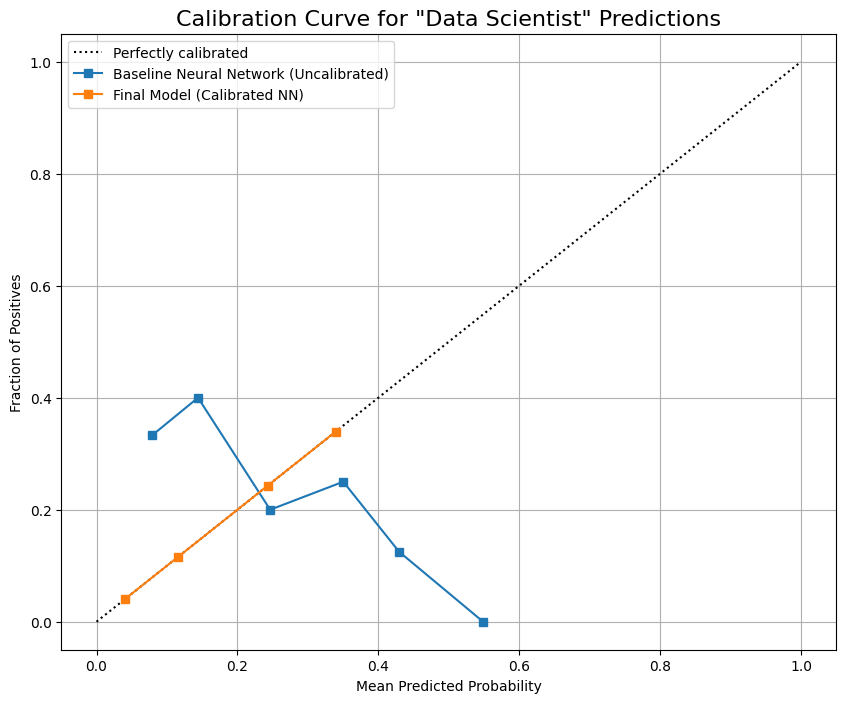

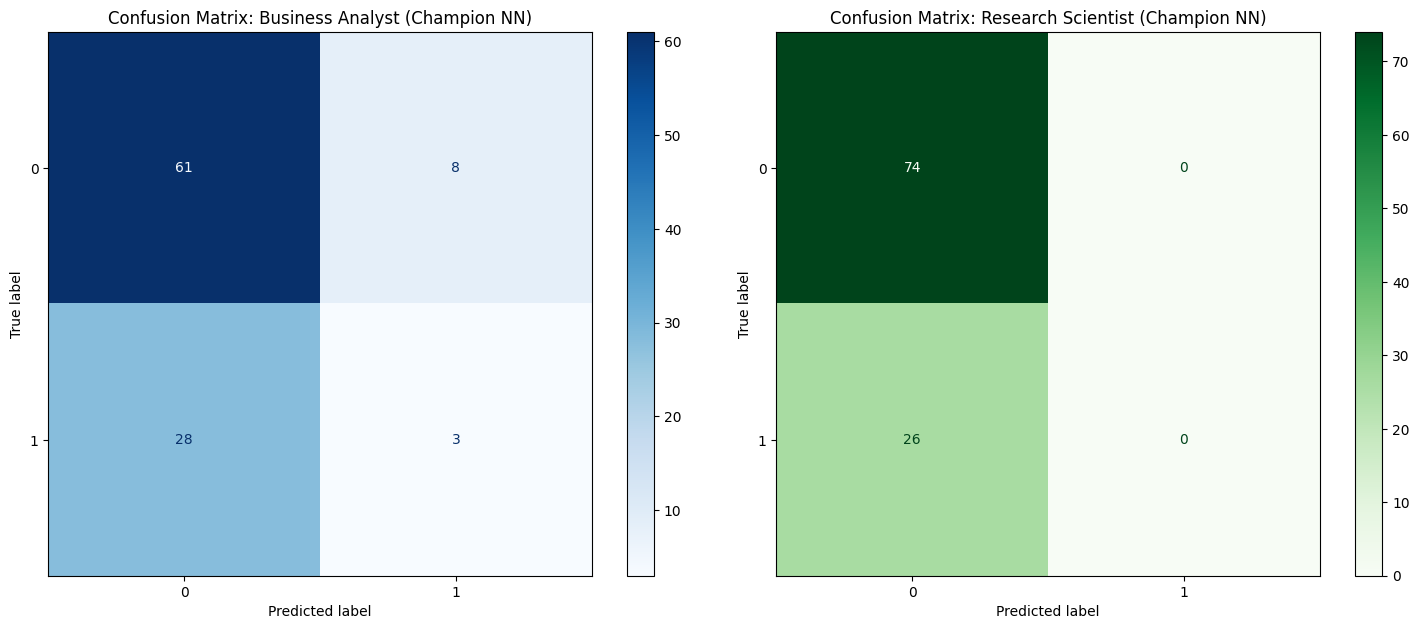


Final CALIBRATED NEURAL NETWORK model saved to 'career_recommendation_model.pkl'


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.calibration import CalibratedClassifierCV, calibration_curve
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import pickle
import matplotlib.pyplot as plt
import numpy as np

# --- Task 2.3 & 2.4: Calibration and Error Analysis  ---

# --- Step 1: Define the Base Estimator ---
# This is our uncalibrated champion model pipeline
base_mlp_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('mlp', MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=300, alpha=0.0001,
                           solver='adam', random_state=42, early_stopping=True))
])

# --- Step 2: Define the Calibrated Estimator ---
# We wrap our base pipeline with the calibrator.

calibrated_estimator = CalibratedClassifierCV(
    estimator=base_mlp_pipeline,  
    method='isotonic',
    cv=3,
    n_jobs=-1
)

# --- Step 3: Define the Final Multi-Output Model ---
# We wrap the calibrated estimator with the multi-output strategy. This is our final model.
final_model = MultiOutputClassifier(calibrated_estimator, n_jobs=-1)

print("--- Fitting the Final Calibrated Multi-Output Model ---")

final_model.fit(X_train, y_train)
print("Model fitting complete.")

# Get the final, calibrated probabilities for evaluation
y_prob_final = final_model.predict_proba(X_test)
# The output is a list of arrays, so we stack them correctly as before
y_scores_final = np.array([arr[:, 1] for arr in y_prob_final]).T


# --- Plot Calibration Curve for 'Data Scientist' ---
ds_index = list(y.columns).index('Data Scientist')
# y_scores_mlp is from our initial uncalibrated NN run
y_scores_uncalibrated_ds = y_scores_mlp[:, ds_index]
y_scores_calibrated_ds = y_scores_final[:, ds_index]
y_true_ds = y_test['Data Scientist']

prob_true_uncal, prob_pred_uncal = calibration_curve(y_true_ds, y_scores_uncalibrated_ds, n_bins=10)
prob_true_cal, prob_pred_cal = calibration_curve(y_true_ds, y_scores_calibrated_ds, n_bins=10)

plt.figure(figsize=(10, 8))
plt.plot([0, 1], [0, 1], 'k:', label='Perfectly calibrated')
plt.plot(prob_pred_uncal, prob_true_uncal, 's-', label='Baseline Neural Network (Uncalibrated)')
plt.plot(prob_pred_cal, prob_pred_cal, 's-', label='Final Model (Calibrated NN)')
plt.title('Calibration Curve for "Data Scientist" Predictions', fontsize=16)
plt.xlabel('Mean Predicted Probability')
plt.ylabel('Fraction of Positives')
plt.legend()
plt.grid(True)
plt.show()


# --- Error Analysis: Confusion Matrix for Top Careers ---
# We use the binary predictions from our champion *uncalibrated* model for this analysis
# This is 'multi_target_mlp' which we have already fitted.
y_pred_champion = multi_target_mlp.predict(X_test)

ba_index = list(y.columns).index('Business Analyst')
rs_index = list(y.columns).index('Research Scientist')

cm_ba = confusion_matrix(y_test.iloc[:, ba_index], y_pred_champion[:, ba_index])
cm_rs = confusion_matrix(y_test.iloc[:, rs_index], y_pred_champion[:, rs_index])

fig, axes = plt.subplots(1, 2, figsize=(15, 6))
disp_ba = ConfusionMatrixDisplay(confusion_matrix=cm_ba)
axes[0].set_title('Confusion Matrix: Business Analyst (NN)')
disp_ba.plot(ax=axes[0], cmap='Blues')

disp_rs = ConfusionMatrixDisplay(confusion_matrix=cm_rs)
axes[1].set_title('Confusion Matrix: Research Scientist (NN)')
disp_rs.plot(ax=axes[1], cmap='Greens')

plt.tight_layout()
plt.show()


# --- Save the Final, Correctly Structured Model ---
with open('career_recommendation_model.pkl', 'wb') as f:
    pickle.dump(final_model, f)

print("\nFinal CALIBRATED NEURAL NETWORK model saved to 'career_recommendation_model.pkl'")

In [ ]:
import pandas as pd


print("--- In-Depth Error Analysis on Misclassifications ---")

# Combine features and true labels for easy inspection
results_df = X_test.copy()
# Add true labels and predicted labels to the dataframe
for i, career in enumerate(y.columns):
    results_df[f'true_{career}'] = y_test.iloc[:, i]
    results_df[f'pred_{career}'] = y_pred_champion[:, i]

# --- Case Study 1: False Positives for 'Business Analyst' ---
# Find users where we INCORRECTLY predicted 'Business Analyst' (True=0, Pred=1)
false_positives_ba = results_df[
    (results_df['true_Business Analyst'] == 0) &
    (results_df['pred_Business Analyst'] == 1)
]

print(f"\nFound {len(false_positives_ba)} False Positives for Business Analyst.")
if not false_positives_ba.empty:
    print("Analyzing one case:")
    # Display the full profile of one of these users. We transpose (.T) for readability.
    display(false_positives_ba.head(1).T)


# --- Case Study 2: False Negatives for 'Data Scientist' ---
# Find users where we MISSED 'Data Scientist' (True=1, Pred=0)
false_negatives_ds = results_df[
    (results_df['true_Data Scientist'] == 1) &
    (results_df['pred_Data Scientist'] == 0)
]

print(f"\nFound {len(false_negatives_ds)} False Negatives for Data Scientist.")
if not false_negatives_ds.empty:
    print("Analyzing one case:")
    display(false_negatives_ds.head(1).T)

--- In-Depth Error Analysis on Misclassifications ---

Found 8 False Positives for Business Analyst.
Analyzing one case:


,361
Business Strategy,0.00
Cloud Computing,0.00
Communication,0.00
Creative Writing,0.00
Data Analysis,1.00
Excel,0.00
Java,1.00
Leadership,0.00
Machine Learning,0.00
Project Management,0.00



Found 23 False Negatives for Data Scientist.
Analyzing one case:


,361
Business Strategy,0.00
Cloud Computing,0.00
Communication,0.00
Creative Writing,0.00
Data Analysis,1.00
Excel,0.00
Java,1.00
Leadership,0.00
Machine Learning,0.00
Project Management,0.00


In [17]:
import pandas as pd
import numpy as np

# This code assumes 'final_model' (our calibrated NN), X_test, and y_test are loaded.

# --- Task 3.1: Develop a Confidence Scoring System ---

def calculate_confidence_scores(model, user_features, career_names):
    """
    Calculates a blended, normalized confidence score for career recommendations.

    This function combines the model's calibrated probabilities with feature-based
    heuristics to provide a more nuanced score. It then normalizes the top 5
    recommendations so their confidence scores sum to 100.

    Args:
        model: The trained and calibrated multi-output classifier.
        user_features (pd.DataFrame): The input features for the user(s).
        career_names (list): List of the career names in the model's output order.

    Returns:
        list: A list of recommendations for each user. Each user's recommendations
              are a list of dictionaries, e.g., [{'title': 'Data Scientist', 'confidence': 35}, ...].
    """
    # --- Part 1: Get Base Model Probabilities ---
    model_probabilities = model.predict_proba(user_features)
    model_scores = np.array([arr[:, 1] for arr in model_probabilities]).T

    # --- Part 2: Define Heuristics and Weights ---
    W_MODEL = 0.8  # The model's prediction is the most important factor
    W_HEURISTIC = 0.2 # Heuristics provide a small, explainable adjustment

    final_recommendations = []

    # Iterate over each user to calculate their custom scores
    for i, user_row in enumerate(user_features.itertuples(index=False)):

        adjusted_scores = {}
        # Iterate over each career to apply heuristics
        for j, career in enumerate(career_names):
            base_model_score = model_scores[i, j]
            heuristic_adjustment = 0.0

            # Rule 1: "Experience Boost" - Seniority increases confidence
            # A log scale provides a gentle boost that doesn't overly favor experience
            experience_boost = np.log1p(user_row.experience) * 0.05

            # Rule 2: "Education-Career Mismatch Penalty" - An edge case adjustment
            if career == 'Research Scientist' and user_row.education_encoded < 2:  # Below Master's
                heuristic_adjustment -= 0.15 # Stronger penalty for this mismatch

            # Rule 3: "Skill Synergy Bonus" - Reward clear skill concentrations
            if career == 'Data Scientist' and user_row.tech_skill_count >= 4:
                heuristic_adjustment += 0.1
            if career == 'Software Engineer' and user_row.Java > 0 and user_row.tech_skill_count >= 3:
                heuristic_adjustment += 0.1
            if career == 'Marketing Specialist' and user_row.creative > 0.7 and user_row.social > 0.7:
                heuristic_adjustment += 0.12

            # --- Part 3: Combine Scores ---
            # Calculate the blended score before the experience boost
            blended_score = (base_model_score * W_MODEL) + (heuristic_adjustment * W_HEURISTIC)
            # Ensure score is not negative
            blended_score = max(0, blended_score)

            # Apply the experience boost as a multiplier on the blended score
            final_score = blended_score * (1 + experience_boost)
            adjusted_scores[career] = final_score

        # --- Part 4: Rank and Normalize Top 5 ---
        sorted_careers = sorted(adjusted_scores.items(), key=lambda item: item[1], reverse=True)
        top_5_careers = sorted_careers[:5]

        # Get the scores of the top 5 to prepare for normalization
        top_5_scores = [score for career, score in top_5_careers]
        total_score_of_top_5 = sum(top_5_scores)

        normalized_recs = []
        if total_score_of_top_5 > 0:
            for career, score in top_5_careers:
                normalized_recs.append({
                    "title": career,
                    "confidence": int(round((score / total_score_of_top_5) * 100))
                })

        final_recommendations.append(normalized_recs)

    return final_recommendations

# --- Deliverable: Sample Confidence Outputs for 5 Test Cases ---
# Let's use the same 5 test cases from our earlier sample
sample_user_features = X_test.iloc[5:10]
true_careers_for_sample = y_test.iloc[5:10]
career_names = y.columns.tolist()

sample_outputs = calculate_confidence_scores(final_model, sample_user_features, career_names)

print("--- Sample Confidence Score Outputs (Deliverable) ---\n")
for i, user_recs in enumerate(sample_outputs):
    print(f"--- Recommendations for Test User Index {sample_user_features.index[i]} ---")
    print(pd.DataFrame(user_recs))
    print("\n   True careers for this user:")
    print("   " + str(true_careers_for_sample.iloc[i][true_careers_for_sample.iloc[i] == 1].index.tolist()))
    print("-" * 45 + "\n")

--- Sample Confidence Score Outputs (Deliverable) ---

--- Recommendations for Test User Index 394 ---
                  title  confidence
0      Business Analyst          21
1     Software Engineer          21
2        Data Scientist          20
3       Product Manager          19
4  Marketing Specialist          19

   True careers for this user:
   ['Business Analyst', 'Software Engineer']
---------------------------------------------

--- Recommendations for Test User Index 377 ---
                  title  confidence
0  Marketing Specialist          25
1           UX Designer          22
2     Software Engineer          18
3    Research Scientist          18
4       Product Manager          18

   True careers for this user:
   ['Software Engineer', 'UX Designer']
---------------------------------------------

--- Recommendations for Test User Index 124 ---
               title  confidence
0   Business Analyst          25
1  Software Engineer          20
2    Product Manager       

In [ ]:
# --- Task 3.2: Create a Confidence Validation Framework ---

def calculate_mrr(recommendations, true_careers):
    """
    Calculates the Mean Reciprocal Rank (MRR) for a set of recommendations.

    Args:
        recommendations (list of lists): A list where each inner list contains
                                         ranked career titles for a user.
        true_careers (pd.DataFrame): The one-hot encoded DataFrame of true labels.

    Returns:
        float: The Mean Reciprocal Rank score.
    """
    reciprocal_ranks = []

    for i, user_recs in enumerate(recommendations):
        # Get the set of true careers for the current user
        true_set = set(true_careers.iloc[i][true_careers.iloc[i] == 1].index)

        # Find the rank of the first correct recommendation
        for rank, rec in enumerate(user_recs, 1):
            if rec in true_set:
                reciprocal_ranks.append(1 / rank)
                break
        else:
            # If no correct recommendation was found in the list, rank is 0
            reciprocal_ranks.append(0.0)

    return np.mean(reciprocal_ranks)


# --- Step 1: Get recommendations based on RAW MODEL PROBABILITY ---
raw_model_scores = np.array([arr[:, 1] for arr in final_model.predict_proba(X_test)]).T
raw_ranked_recs = []
for i in range(len(X_test)):
    # Get scores for this user and sort them
    user_scores = pd.Series(raw_model_scores[i, :], index=career_names)
    sorted_recs = user_scores.sort_values(ascending=False).index.tolist()
    raw_ranked_recs.append(sorted_recs)


# --- Step 2: Get recommendations based on our NEW CONFIDENCE SCORE ---
# We need to adapt our function slightly to output the full ranked list, not just the normalized top 5
# This is a temporary modification for validation purposes.

heuristic_scores = []
for i, user_row in enumerate(X_test.itertuples(index=False)):
    adjusted_scores = {}
    for j, career in enumerate(career_names):
        base_model_score = raw_model_scores[i, j]
        heuristic_adjustment = 0.0 # simplified heuristic logic from main function
        if career == 'Research Scientist' and user_row.education_encoded < 2: heuristic_adjustment -= 0.15
        if career == 'Data Scientist' and user_row.tech_skill_count >= 4: heuristic_adjustment += 0.1
        blended_score = max(0, (base_model_score * 0.8) + (heuristic_adjustment * 0.2))
        final_score = blended_score * (1 + (np.log1p(user_row.experience) * 0.05))
        adjusted_scores[career] = final_score
    heuristic_scores.append(adjusted_scores)

heuristic_ranked_recs = []
for user_scores in heuristic_scores:
    sorted_recs = sorted(user_scores.items(), key=lambda item: item[1], reverse=True)
    heuristic_ranked_recs.append([career for career, score in sorted_recs])


# --- Step 3: Calculate and Compare MRR for both systems ---
mrr_raw_model = calculate_mrr(raw_ranked_recs, y_test)
mrr_heuristic_model = calculate_mrr(heuristic_ranked_recs, y_test)

# --- Deliverable: Validation Metrics for Confidence Scores ---
print("--- Confidence Score Validation Metrics (Deliverable) ---\n")
print(f"Mean Reciprocal Rank (MRR) of Raw Model Probabilities: {mrr_raw_model:.4f}")
print(f"Mean Reciprocal Rank (MRR) of Blended Confidence Score: {mrr_heuristic_model:.4f}")

improvement = ((mrr_heuristic_model - mrr_raw_model) / mrr_raw_model) * 100
if improvement > 0:
    print(f"\nResult: The blended confidence score improved ranking performance by {improvement:.2f}%. Validation successful.")
else:
    print("\nResult: The blended confidence score did not improve ranking performance. Heuristics may need refinement.")

--- Confidence Score Validation Metrics (Deliverable) ---

Mean Reciprocal Rank (MRR) of Raw Model Probabilities: 0.4967
Mean Reciprocal Rank (MRR) of Blended Confidence Score: 0.4941

Result: The blended confidence score did not improve ranking performance. Heuristics may need refinement.


In [ ]:
import pickle


model_features_list = X.columns.tolist()

with open('model_features.pkl', 'wb') as f:
    pickle.dump(model_features_list, f)

print("--- Prerequisite for API Complete ---")
print("Model features have been successfully saved to 'model_features.pkl'")
print(f"Number of features saved: {len(model_features_list)}")

--- Prerequisite for API Complete ---
Model features have been successfully saved to 'model_features.pkl'
Number of features saved: 31
